In [1]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
dta = sm.datasets.webuse('lutkepohl2', 'https://www.stata-press.com/data/r12/')
dta.index = dta.qtr
dta.index.freq = dta.index.inferred_freq
endog = dta.loc['1960-04-01':'1978-10-01', ['dln_inv']]
exog = dta.loc['1960-04-01':'1978-10-01', ['dln_inc', 'dln_consump']]

In [5]:
dta.head()
dta.dtypes

inv                     int16
inc                     int16
consump                 int16
qtr            datetime64[ns]
ln_inv                float32
dln_inv               float32
ln_inc                float32
dln_inc               float32
ln_consump            float32
dln_consump           float32
dtype: object

<Axes: xlabel='qtr'>

<Axes: xlabel='qtr'>

<Axes: xlabel='qtr'>

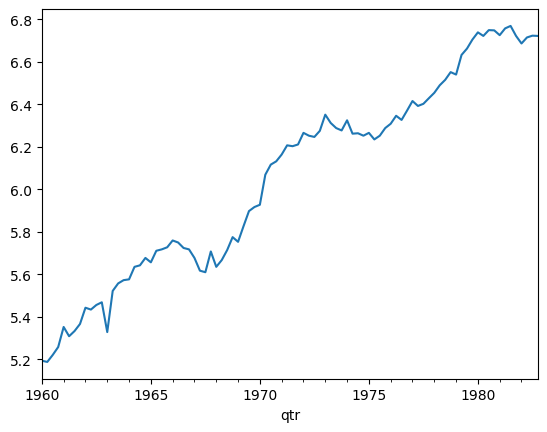

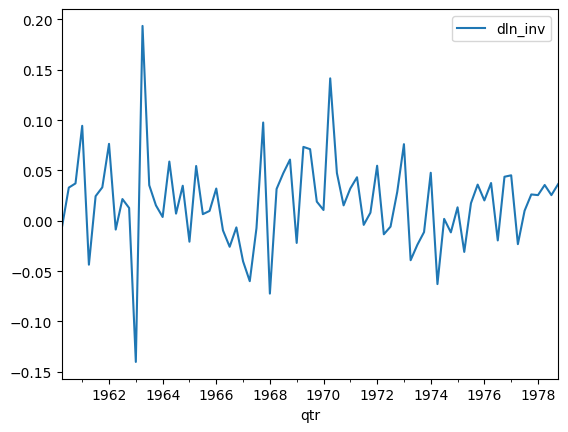

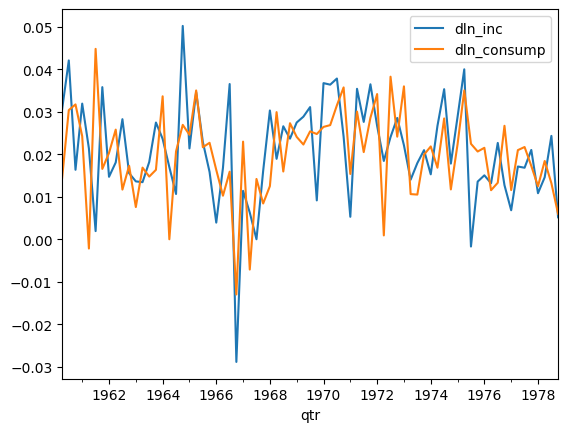

In [14]:
# display(dta['inv'].plot())
display(dta['ln_inv'].plot())
display(endog.plot())
exog.plot()

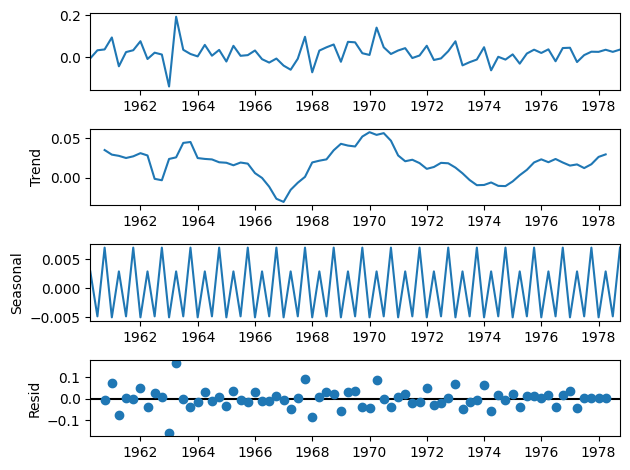

<Axes: xlabel='qtr', ylabel='Resid'>

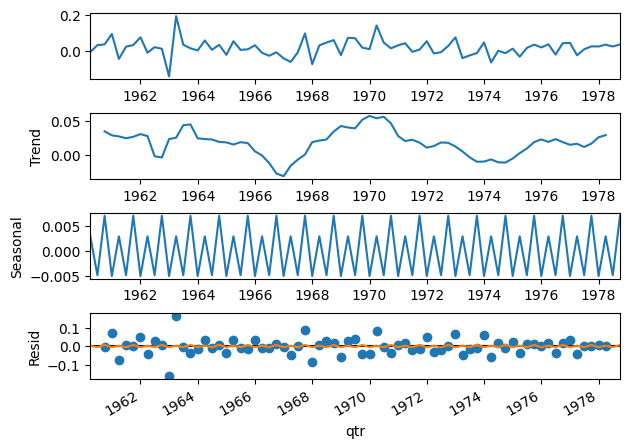

In [19]:
display(sm.tsa.seasonal_decompose(endog,model='additive').plot())
sm.tsa.seasonal_decompose(endog,model='additive').seasonal.plot()

In [37]:
sarimax_exog_res = sm.tsa.SARIMAX(endog=endog, exog=exog, order=(1, 0, 1), seasonal_order=(1,0,1,4),trend="n").fit(maxiter=1000)
print(sarimax_exog_res.summary())
print(sarimax_exog_res.summary().as_latex())
for table in sarimax_exog_res.summary().tables:
    print('#################################################')
    print(table.as_latex_tabular())

                                     SARIMAX Results                                     
Dep. Variable:                           dln_inv   No. Observations:                   75
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 4)   Log Likelihood                 133.284
Date:                           Fri, 21 Apr 2023   AIC                           -252.568
Time:                                   12:14:24   BIC                           -236.345
Sample:                               04-01-1960   HQIC                          -246.090
                                    - 10-01-1978                                         
Covariance Type:                             opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
dln_inc        -0.1224      0.561     -0.218      0.827      -1.222       0.977
dln_consump     1.1533      0.672      1